## Importing Libraries:

In [1]:
%matplotlib inline #to run matplotlib within the notebook

UsageError: unrecognized arguments: #to run matplotlib within the notebook


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/imagewoof2-160.zip  # unzipping the dataset

Streaming output truncated to the last 5000 lines.
  inflating: imagewoof2-160/train/n02111889/n02111889_7083.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7085.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7115.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7129.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7148.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7156.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7163.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7198.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7207.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7238.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7274.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7285.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7327.JPEG  
  inflating: imagewoof2-160/train/n02111889/n02111889_7363.JPEG  
  inflating: imagewoof2-1

In [4]:
from fastai.vision import *    #Let's Import FastAI
from fastai.metrics import accuracy

## Importing the data and applying some image transforms:

In [5]:
data = ImageDataBunch.from_folder("/content/imagewoof2-160/train/",
                                  
                                 ds_tfms = get_transforms(do_flip=False, flip_vert=False), ## set flips to false
                                  
                                 valid_pct=0.2, ##validation set split percentage = 20%
                                  
                                 size=128, ##image size = 128
                                  
                                 bs=32)   ##batch size = 32

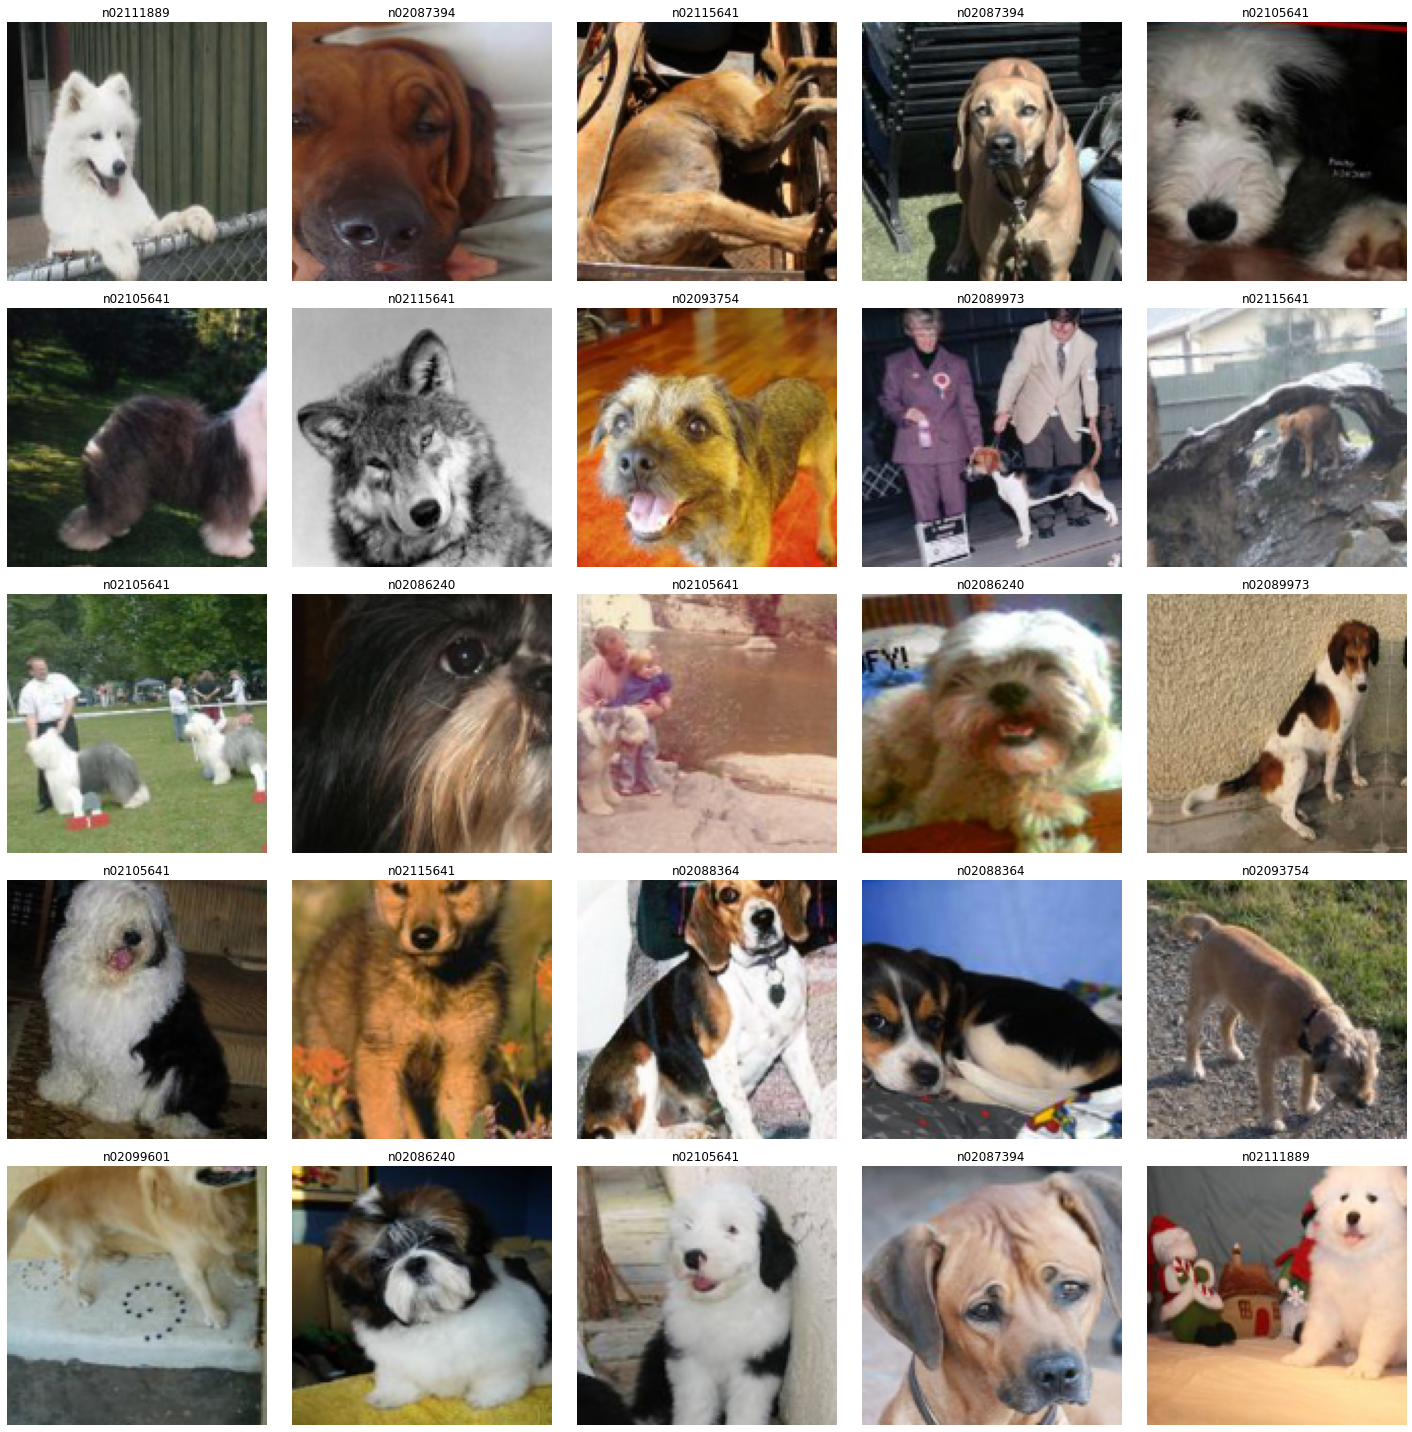

In [6]:
data.show_batch(row=3) ## Let's look at our data

In [7]:
print(data.classes)  ## all the classes for the dogs in the imagewoof dataset

['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']


## Training the model using pretrained Resnet34 and discriminative learning rates:

In [8]:
learn = cnn_learner(data, models.resnet34, pretrained = True, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [10]:
learn.fit_one_cycle(10, max_lr=slice(8e-3,1e-2))


epoch,train_loss,valid_loss,accuracy,time
0,0.895369,0.536259,0.827701,00:35
1,0.907910,0.926881,0.739612,00:35
2,0.926700,0.838720,0.719114,00:34
3,0.793275,0.731850,0.772299,00:34
4,0.689441,0.599390,0.793906,00:34
5,0.638423,0.559177,0.814404,00:34
6,0.538135,0.484441,0.844321,00:34
7,0.450655,0.407815,0.865928,00:34
8,0.389293,0.417443,0.866482,00:33
9,0.337462,0.396299,0.873130,00:33


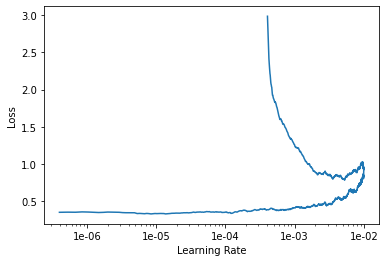

In [11]:
learn.recorder.plot()